# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal=',')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
data.describe()

,total_images,rooms,floor
count,23699.000000,23699.000000,23699.000000
mean,9.858475,2.070636,5.892358
std,5.682529,1.078405,4.885249
min,0.000000,0.000000,1.000000
25%,6.000000,1.000000,2.000000
50%,9.000000,2.000000,4.000000
75%,14.000000,3.000000,8.000000
max,50.000000,19.000000,33.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   total_images          23699 non-null  int64 
 1   last_price            23699 non-null  object
 2   total_area            23699 non-null  object
 3   first_day_exposition  23699 non-null  object
 4   rooms                 23699 non-null  int64 
 5   ceiling_height        14504 non-null  object
 6   floors_total          23613 non-null  object
 7   living_area           21796 non-null  object
 8   floor                 23699 non-null  int64 
 9   is_apartment          2775 non-null   object
 10  studio                23699 non-null  bool  
 11  open_plan             23699 non-null  bool  
 12  kitchen_area          21421 non-null  object
 13  balcony               12180 non-null  object
 14  locality_name         23650 non-null  object
 15  airports_nearest      18157 non-null

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'floor'}>, <AxesSubplot:>]],
      dtype=object)

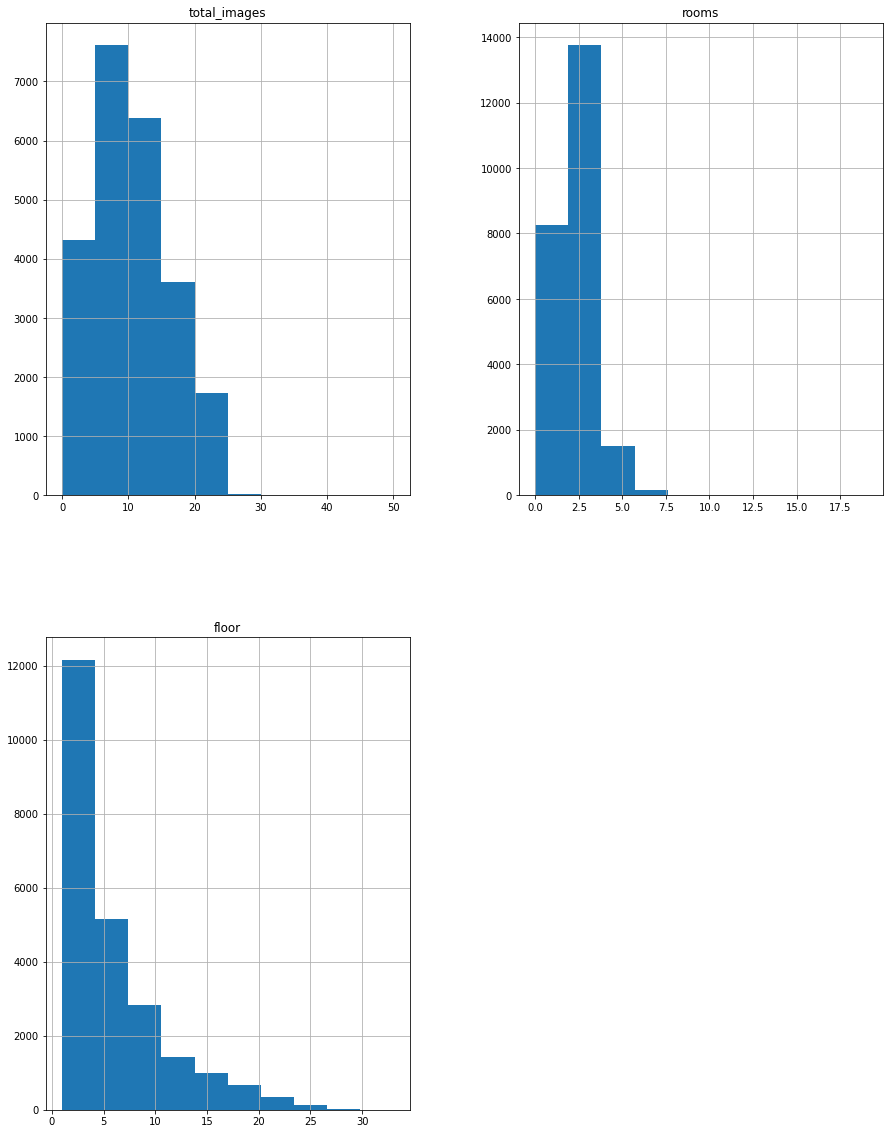

In [5]:
data.hist(figsize=(15, 20))

# Наблюдения:
1. total_images - заполненный столбец
2. last_price - заполненный столбец заменим на int
3. total_area - заполненный столбец заменим на int
4. first_day_exposition - заполненный столбец поменям на datetime 
5. rooms - заполненный столбец, все корректно
6. ceiling_height - заполнено только часть значений, но вариация небольшая у показателя, будем заполнять самым частым значением заменим на int
7. floors_total - есть 86 пропусков, думаю можно будет их удалить, или заменить. Меняем тип на int
8. living_area - 1 903 пропуков, надо посмотреть, какие столбцы заполнены в группе. Меняем тип на int
9. floor - заполненный столбец
10. is_apartment - много пропусков, по смыслу булев столбец, но в таблице - object, скорее всего пропуски там где не аппартаменты, надо проверить
11. studio - заполненный столбец
12. open_plan - заполненный столбец
13. kitchen_area - 9,6% пропусков, может быть из за типа квартиры, например студия, где нет четкого разделения на кухню-гостиную. Меняем тип на int
14. balcony - почти 50% пропусков, скорее всего где пропуск, там балкона и нет. Поэтому вполне себе можно заменить на 0. Меняем тип на int
15. locality_name - есть незначительные пропуски, нужно проанализировать
16. airports_nearest - 23% пропусков, нужно сравнить с тими объектами, где поле заполнено. Меняем тип на int
17. cityCenters_nearest - также много пропусков, нужно анализировать по примеру airports_nearest. Меняем тип на int
18. parks_nearest - пропусков много, нужно смотреть. Меняем тип на int
19. ponds_around3000 - аналогично parks_nearest. Меняем тип на int
20. days_exposition - 13% пропусков, довольно много, нужно анализировать, поменять тип на int

### Предобработка данных

# Total_images

In [6]:
data['total_images'].describe()

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

In [7]:
data['total_images'].value_counts()

10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
4      986
14     986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
28       4
32       4
29       3
50       3
27       2
35       2
30       2
31       2
39       1
25       1
42       1
37       1
Name: total_images, dtype: int64

Text(0.5, 1.0, 'total_images')

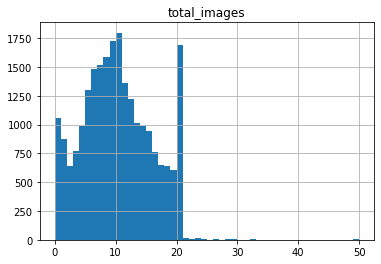

In [8]:
data['total_images'].hist(bins=50).set_title('total_images')

Все корректно

# Функции для описания столбцов

In [9]:
def to_numeric(series):
    data[series] = pd.to_numeric(data[series], errors='ignore')

In [10]:
def astype(series, t):
    data[series] = data[series].astype(t)

In [11]:
def series_analys(series):
    display(data[series].head(15))
    display(data[series].describe())
    display(data[series].hist(bins=100, figsize=(16, 4)).set_title(series))

In [12]:
def percent(series):
    percent = 100 / data['total_images'].count() * (data['total_images'].count() - data[series].count())
    print('Пропусков в столбце', series,':', percent,'%' )

# last_price

In [13]:
data['last_price'] = data['last_price'].astype(float)

0     13000000.0
1      3350000.0
2      5196000.0
3     64900000.0
4     10000000.0
5      2890000.0
6      3700000.0
7      7915000.0
8      2900000.0
9      5400000.0
10     5050000.0
11     3300000.0
12     3890000.0
13     3550000.0
14     4400000.0
Name: last_price, dtype: float64

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Text(0.5, 1.0, 'last_price')

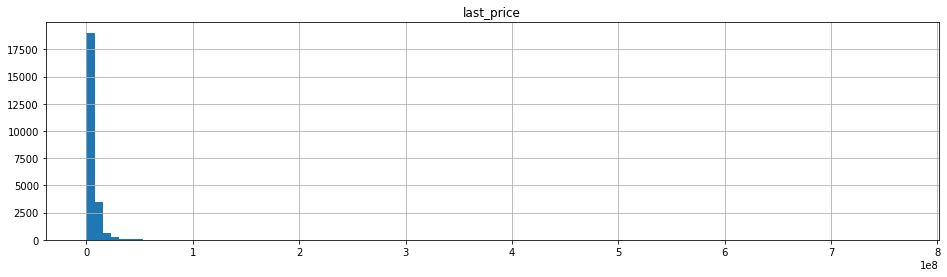

In [14]:
series_analys('last_price')

# total_area

In [15]:
astype('total_area', float)

0     108.00
1      40.40
2      56.00
3     159.00
4     100.00
5      30.40
6      37.30
7      71.60
8      33.16
9      61.00
10     39.60
11     44.00
12     54.00
13     42.80
14     36.00
Name: total_area, dtype: float64

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Text(0.5, 1.0, 'total_area')

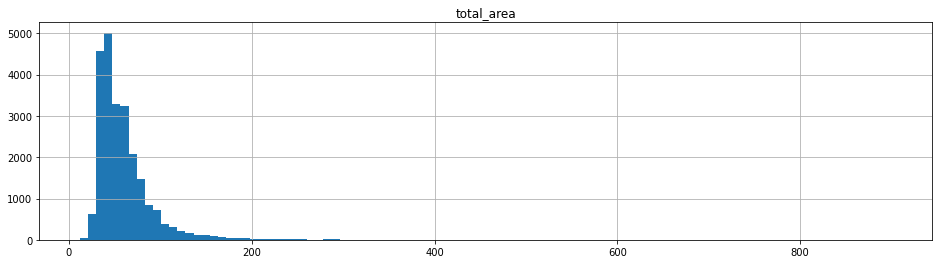

In [16]:
series_analys('total_area')

<AxesSubplot:>

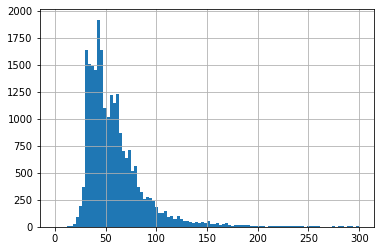

In [17]:
data['total_area'].hist(bins=100, range=(0, 300))

**Общая площадь заполнена полностью**

# first_day_exposition

In [18]:
data['first_day_exposition'].describe()

count                   23699
unique                   1491
top       2018-02-01T00:00:00
freq                      368
Name: first_day_exposition, dtype: object

In [19]:
display(data['first_day_exposition'])

0        2019-03-07T00:00:00
1        2018-12-04T00:00:00
2        2015-08-20T00:00:00
3        2015-07-24T00:00:00
4        2018-06-19T00:00:00
                ...         
23694    2017-03-21T00:00:00
23695    2018-01-15T00:00:00
23696    2018-02-11T00:00:00
23697    2017-03-28T00:00:00
23698    2017-07-21T00:00:00
Name: first_day_exposition, Length: 23699, dtype: object

**Время везде 00:00, поэтому можно оставить только дату**

In [20]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [21]:
display(data['first_day_exposition'].head())

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

# rooms

0     3
1     1
2     2
3     3
4     2
5     1
6     1
7     2
8     1
9     3
10    1
11    2
12    2
13    2
14    1
Name: rooms, dtype: int64

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Text(0.5, 1.0, 'rooms')

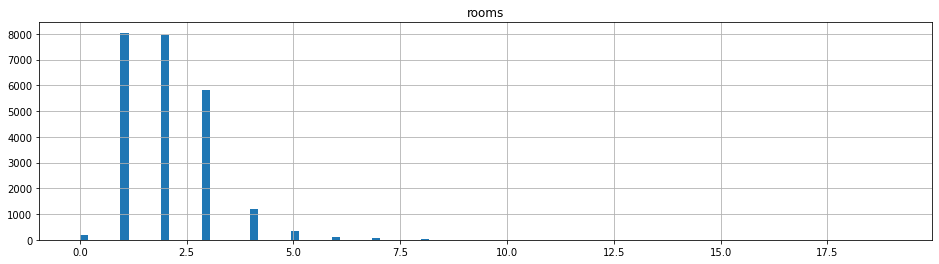

In [22]:
series_analys('rooms')

**Минимальное значение 0 (197 квратир), максимальное - 19 комнат, выглядит как ошибка, можно сгруппировать квартиры по количеству комнат, и посмотреть основные данные по каждой группе**

In [23]:
data['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

Данные от 8 комнат и выше - незначительные, можно посмотреть какой это тип квартир

In [24]:
rooms_pivot = data.pivot_table(index='rooms', values='total_area', aggfunc='mean')
display(rooms_pivot)

,total_area
rooms,
0,29.279746
1,37.644669
2,55.855089
3,77.764580
4,107.610763
5,161.474816
6,201.537619
7,265.325424
8,259.233333


In [25]:
drop_list_rooms = data.query('rooms >= 10').index #создаем список для удаления выбросов в кол-ве комнат больше 9

In [26]:
data.drop(drop_list_rooms, inplace=True) #удаляем выбросы

In [27]:
data['rooms'].unique() #выбросы удалены

array([3, 1, 2, 4, 5, 6, 0, 7, 8, 9])

In [28]:
data.query('rooms == 0').describe() #описание квартир с 0 комнат

,total_images,last_price,total_area,rooms,floor
count,197.000000,1.970000e+02,197.000000,197.0,197.000000
mean,7.776650,3.337724e+06,29.279746,0.0,8.578680
std,5.079055,5.046022e+06,25.855264,0.0,6.290595
min,0.000000,9.457500e+05,15.500000,0.0,1.000000
25%,4.000000,2.300000e+06,24.050000,0.0,3.000000
50%,7.000000,2.700000e+06,26.050000,0.0,7.000000
75%,11.000000,3.380000e+06,28.400000,0.0,13.000000
max,21.000000,7.100000e+07,371.000000,0.0,26.000000


**В среднем площадь таких квартир 20 квадратов, можно заменить О на 1. для исправления ошибки**

In [29]:
display(data.groupby('rooms')['studio'].unique())

rooms
0    [True, False]
1    [False, True]
2          [False]
3          [False]
4          [False]
5          [False]
6          [False]
7          [False]
8          [False]
9          [False]
Name: studio, dtype: object

In [30]:
data.loc[data['studio'] == True, 'rooms'] = 0

In [31]:
display(data.groupby('rooms')['studio'].unique())

rooms
0    [True, False]
1          [False]
2          [False]
3          [False]
4          [False]
5          [False]
6          [False]
7          [False]
8          [False]
9          [False]
Name: studio, dtype: object

In [32]:
studio_open_plan = data[(data['studio'] == True) & (data['open_plan'] == True)]
display(studio_open_plan)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


**После замены количества комнат у студий на 0, проверили уникальные значения 'studio' сгруппированой по 'rooms'. Так же видно, что у "нулевых" комнат есть значения True и False, т.е. это либо студия, либо открытая планировка. Создав датфрейм 'studio_open_plan' и выведя его на экран он оказался пуст, т.е. ошибок нет**

0     3
1     1
2     2
3     3
4     2
5     1
6     1
7     2
8     1
9     3
10    1
11    2
12    2
13    2
14    1
Name: rooms, dtype: int64

count    23688.000000
mean         2.065138
std          1.052000
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          9.000000
Name: rooms, dtype: float64

Text(0.5, 1.0, 'rooms')

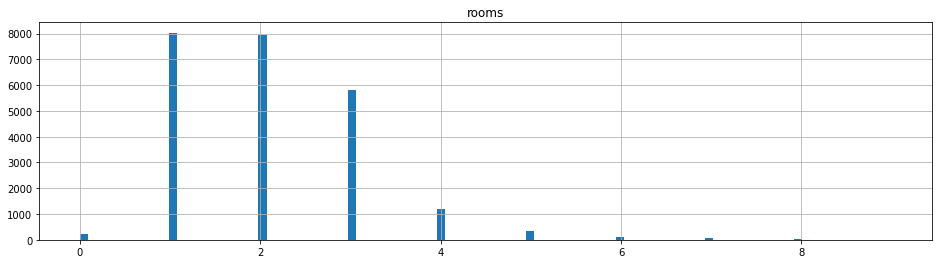

In [34]:
series_analys('rooms')

# ceiling_height

In [35]:
astype('ceiling_height', float)

0     2.70
1      NaN
2      NaN
3      NaN
4     3.03
5      NaN
6      NaN
7      NaN
8      NaN
9     2.50
10    2.67
11     NaN
12     NaN
13    2.56
14     NaN
Name: ceiling_height, dtype: float64

count    14495.000000
mean         2.771214
std          1.261382
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Text(0.5, 1.0, 'ceiling_height')

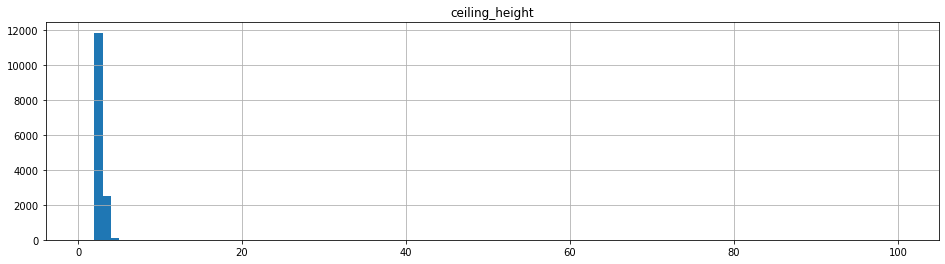

In [36]:
series_analys('ceiling_height')

<AxesSubplot:>

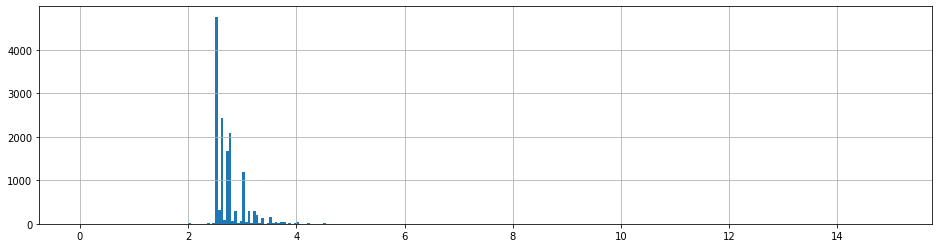

In [37]:
data['ceiling_height'].hist(bins=300, range=(0, 15), figsize=(16, 4)) #посмотрим поближе

<AxesSubplot:>

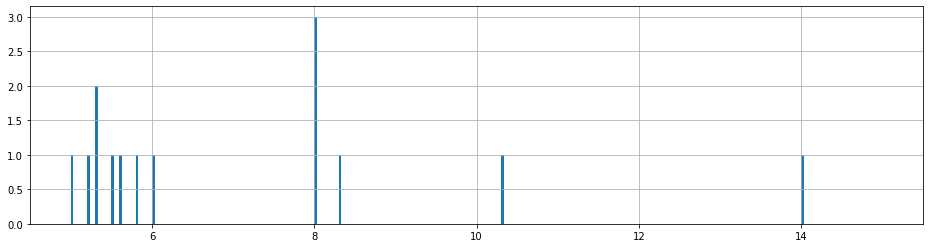

In [38]:
data['ceiling_height'].hist(bins=300, range=(5, 15), figsize=(16, 4)) #еще ближе, но уже правую часть гистограммы

<AxesSubplot:>

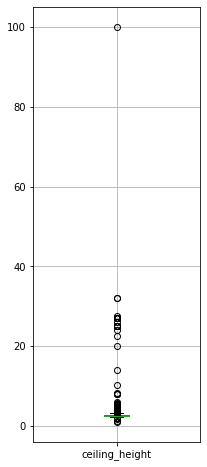

In [39]:
data.boxplot(column='ceiling_height', figsize=(3,8))

In [40]:
data['ceiling_height'].unique() #смотрим уникальные значения высоты потолков

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.16,
      

In [41]:
drop_list = data.query('ceiling_height < 2 or ceiling_height > 19').index

In [42]:
data.drop(drop_list, inplace=True) #удаляем выбросы

In [43]:
data['ceiling_height'].unique() 

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,
        2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,
        2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,
        3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,
        3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        8.  ,  3.16,  3.26,  3.34,  2.81,  3.44,  2.97,  4.37,  2.68,
        3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.14,
        3.32,  8.3 ,

In [44]:
data.loc[data['ceiling_height'] < 2.5, 'ceiling_height'] = 2.5

Видно, что есть квартиры с высотой поотолков 2 метра и это скорее всего ошибка при вводе данных или при выгрузке. Поищем какая минимальная высота потолков в РФ и в соответствии с п.5.8 СНиП 31-01-2003 она составляет 2.5 метра, в связи с этим заменим все значения ниже 2.5 на 2.5

In [45]:
data['ceiling_height'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.73,  2.84,  3.1 ,  3.4 ,  3.06,  2.72,  2.54,  2.51,  2.78,
        2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,  3.6 ,
        2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,  3.62,  3.12,  2.53,
        2.74,  2.96,  5.3 ,  5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,
        3.54,  3.53,  2.83,  4.7 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,
        3.18,  3.35,  3.57,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  8.  ,  3.16,  3.26,  3.34,  2.81,  3.44,  2.97,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,
        3.14,  3.32,  8.3 ,  2.98,  2.86,  3.17,  4.4 ,  3.28,  3.04,
        4.45,  5.5 ,

In [46]:
display(data.groupby('rooms')['ceiling_height'].median()) 

rooms
0    2.745
1    2.640
2    2.600
3    2.650
4    2.800
5    3.100
6    3.200
7    3.380
8    3.420
9    3.200
Name: ceiling_height, dtype: float64

In [47]:
data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby('rooms')['ceiling_height'].transform('median'))
#заменим пропуски медианными значениями по группе "комнатности" квартир
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23662 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23662 non-null  int64         
 1   last_price            23662 non-null  float64       
 2   total_area            23662 non-null  float64       
 3   first_day_exposition  23662 non-null  datetime64[ns]
 4   rooms                 23662 non-null  int64         
 5   ceiling_height        23662 non-null  float64       
 6   floors_total          23576 non-null  object        
 7   living_area           21759 non-null  object        
 8   floor                 23662 non-null  int64         
 9   is_apartment          2763 non-null   object        
 10  studio                23662 non-null  bool          
 11  open_plan             23662 non-null  bool          
 12  kitchen_area          21388 non-null  object        
 13  balcony         

# floors_total

**В датасете есть еще столбец floor, можно заполнить пропуски по такому методу - если floor до 5, то это пятиэтажка, если  floor больше 5 и меньше или равно 9, то 9ти этажка**

In [48]:
to_numeric('floors_total')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23662 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23662 non-null  int64         
 1   last_price            23662 non-null  float64       
 2   total_area            23662 non-null  float64       
 3   first_day_exposition  23662 non-null  datetime64[ns]
 4   rooms                 23662 non-null  int64         
 5   ceiling_height        23662 non-null  float64       
 6   floors_total          23576 non-null  float64       
 7   living_area           21759 non-null  object        
 8   floor                 23662 non-null  int64         
 9   is_apartment          2763 non-null   object        
 10  studio                23662 non-null  bool          
 11  open_plan             23662 non-null  bool          
 12  kitchen_area          21388 non-null  object        
 13  balcony         

0     16.0
1     11.0
2      5.0
3     14.0
4     14.0
5     12.0
6     26.0
7     24.0
8     27.0
9      9.0
10    12.0
11     5.0
12     5.0
13     5.0
14     6.0
Name: floors_total, dtype: float64

count    23576.000000
mean        10.676111
std          6.592887
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Text(0.5, 1.0, 'floors_total')

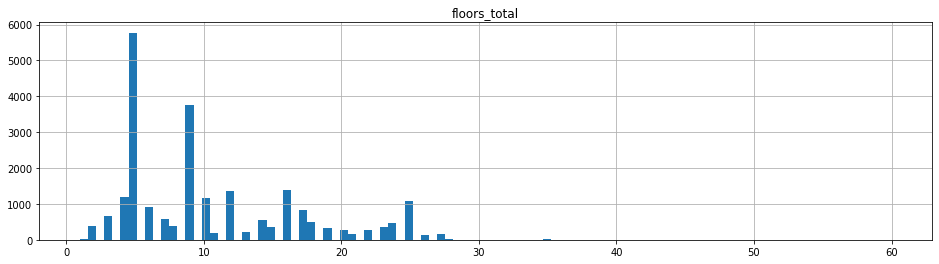

In [49]:
series_analys('floors_total')

In [50]:
data['floors_total'].value_counts()

5.0     5774
9.0     3759
16.0    1376
12.0    1361
4.0     1197
10.0    1173
25.0    1073
6.0      911
17.0     832
3.0      667
7.0      590
14.0     552
18.0     505
24.0     468
8.0      390
2.0      380
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       2
29.0       1
60.0       1
52.0       1
34.0       1
33.0       1
Name: floors_total, dtype: int64

In [51]:
display(data[data['floors_total'].isna()].head(15))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.20,2018-10-02,2,2.60,NaN,30.8,4,NaN,...,12.0,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.10,2016-11-23,1,2.64,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.80,2015-08-01,2,2.60,NaN,38.4,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0000000000001
671,4,6051191.0,93.60,2017-04-06,3,2.65,NaN,47.1,8,NaN,...,16.8,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.00,2017-04-22,1,2.64,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
1930,1,9750000.0,66.77,2016-05-13,2,2.60,NaN,NaN,4,NaN,...,NaN,0.0,Санкт-Петербург,39886.0,10660.0,1.0,2276.0,3.0,244.0,90.00000000000001
2392,7,5395770.0,53.00,2017-06-29,2,2.60,NaN,29.0,22,NaN,...,9.0,0.0,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48.00000000000001
2846,4,2325000.0,27.80,2016-09-21,1,2.64,NaN,19.4,15,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307.0
2952,10,6500000.0,54.30,2019-04-23,1,2.64,NaN,22.2,6,NaN,...,12.3,NaN,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
3031,9,6400000.0,56.70,2018-03-27,2,2.60,NaN,32.0,12,NaN,...,12.0,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.0


In [52]:
data.loc[data.query('floors_total.isna() == True and floor >= 1 and floor <= 5').index, 'floors_total'] = 5
data.loc[data.query('floors_total.isna() == True and floor > 5 and floor<= 9').index, 'floors_total'] = 9

In [53]:
data['floors_total'].isna().sum()

37

**После замены на 5ти и 9ти этажки, осталось 37 значений, объекты, которые не попали в самые распространенные этажности заполним соотвествющим этажам из floor**

In [54]:
data.loc[data.query('floors_total.isna() == True and floor > 9').index, 'floors_total'] = data['floor']

In [55]:
data['floors_total'].isna().sum()

0

In [56]:
astype('floors_total', int)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23662 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23662 non-null  int64         
 1   last_price            23662 non-null  float64       
 2   total_area            23662 non-null  float64       
 3   first_day_exposition  23662 non-null  datetime64[ns]
 4   rooms                 23662 non-null  int64         
 5   ceiling_height        23662 non-null  float64       
 6   floors_total          23662 non-null  int64         
 7   living_area           21759 non-null  object        
 8   floor                 23662 non-null  int64         
 9   is_apartment          2763 non-null   object        
 10  studio                23662 non-null  bool          
 11  open_plan             23662 non-null  bool          
 12  kitchen_area          21388 non-null  object        
 13  balcony         

# living_area

In [58]:
astype('living_area', float)

0     51.00
1     18.60
2     34.30
3       NaN
4     32.00
5     14.40
6     10.60
7       NaN
8     15.43
9     43.60
10    20.30
11    31.00
12    30.00
13    27.00
14    17.00
Name: living_area, dtype: float64

count    21759.000000
mean        34.366720
std         21.536938
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        347.500000
Name: living_area, dtype: float64

Text(0.5, 1.0, 'living_area')

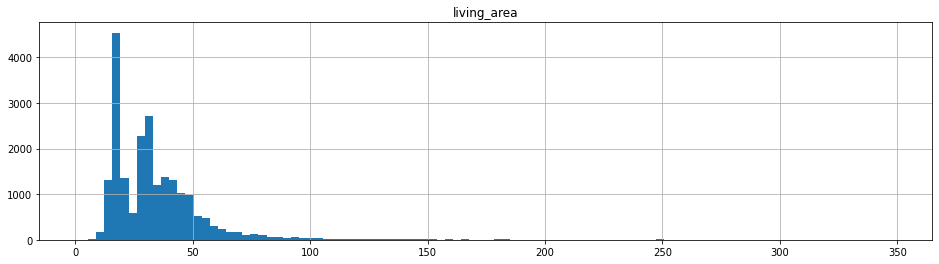

In [59]:
series_analys('living_area') #найдена площадь 2 кв.м - выглядит как ошибка

<AxesSubplot:>

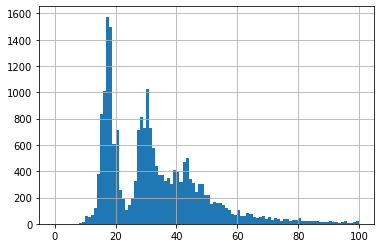

In [60]:
data['living_area'].hist(bins=100, range=(0, 100))

In [61]:
percent('living_area')

Пропусков в столбце living_area : 8.042430901867974 %


In [62]:
data[data['living_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.60,2019-04-18,2,2.60,24,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.80,2018-02-19,1,2.64,9,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28,2,2.50,5,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.00,2018-11-18,1,2.64,22,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000.0,80.30,2018-07-03,3,2.70,12,NaN,5,NaN,...,NaN,NaN,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000.0,88.00,2018-01-12,4,2.55,10,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.60,2018-02-08,1,2.80,9,NaN,2,NaN,...,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.00000000000001
23679,0,2500000.0,35.00,2017-12-08,1,2.64,9,NaN,4,NaN,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.00000000000001


**В датасете есть 3 столбца описывающих площадь - total_area, living_area, kitchen_area**

In [63]:
astype('kitchen_area', float)

In [64]:
data.groupby('rooms')['living_area'].median()

rooms
0     18.000
1     17.600
2     30.500
3     45.000
4     63.550
5     91.785
6    123.900
7    145.000
8    161.000
9    179.200
Name: living_area, dtype: float64

In [65]:
data['living_area'] = data['living_area'].fillna(data.groupby('rooms')['living_area'].transform('median'))
#заменим пропуски медианными значениями по группе "комнатности" квартир

In [66]:
display(data[data['living_area'] < 10].head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
114,5,4000000.0,21.4,2019-02-07,1,2.90,8,8.3,7,NaN,...,6.3,NaN,Санкт-Петербург,27089.0,5791.0,2.0,488.0,1.0,286.0,NaN
680,14,7200000.0,43.0,2017-10-31,1,2.64,8,9.0,2,NaN,...,23.0,NaN,Санкт-Петербург,23900.0,5232.0,1.0,2137.0,1.0,933.0,296.0
1326,8,8100000.0,52.0,2017-01-29,2,2.70,25,9.0,15,NaN,...,32.0,2.0,Санкт-Петербург,35555.0,15561.0,0.0,NaN,1.0,1180.0,337.0
2309,10,4200000.0,62.4,2017-06-15,2,2.60,9,8.4,6,NaN,...,41.0,2.0,посёлок Шушары,23662.0,29448.0,0.0,NaN,0.0,NaN,111.0
3242,7,4440000.0,41.0,2017-07-02,1,2.64,17,3.0,17,NaN,...,11.0,NaN,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
4100,17,5300000.0,34.8,2017-06-19,1,2.70,23,9.0,15,NaN,...,17.1,0.0,Санкт-Петербург,33626.0,13495.0,0.0,NaN,0.0,NaN,30.0
4542,12,3300000.0,18.0,2018-11-07,1,3.50,5,9.0,2,NaN,...,NaN,NaN,Санкт-Петербург,25157.0,4948.0,2.0,349.0,1.0,963.0,9.0
7312,8,3400000.0,27.0,2018-02-21,2,2.50,15,9.0,4,NaN,...,16.0,NaN,Санкт-Петербург,50246.0,16444.0,1.0,617.0,0.0,NaN,NaN
8325,9,4800000.0,52.0,2017-10-25,2,2.60,5,9.0,2,NaN,...,6.0,1.0,Санкт-Петербург,33358.0,13171.0,0.0,NaN,2.0,118.0,119.0
13915,20,6350000.0,52.0,2018-02-06,2,3.00,6,2.0,2,NaN,...,9.0,NaN,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0


In [67]:
data.loc[((data['living_area'] < 10) & (data['studio'] == True)), 'living_area'] = data['total_area'] - 4
#заменил жилую площадь в студиях. По формуле "общ. площадь - 4", где "4" площадь туалета.
data.loc[(data['living_area'] < 10), 'living_area'] = data['total_area'] - data['kitchen_area'] - 4
#заменил жилую площадь в остальных квартирах. По формуле "общ. площадь - площадь кухни - 4", где "4" площадь туалета
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area
count,23662.000000,2.366200e+04,23662.000000,23662.000000,23662.000000,23662.000000,23661.000000,23662.000000,21388.000000
mean,9.860663,6.515768e+06,60.220437,2.065337,2.697063,10.677077,34.254903,5.892993,10.558622
std,5.681529,1.054275e+07,34.830086,1.052186,0.252693,6.589125,21.237289,4.884331,5.831904
min,0.000000,1.219000e+04,12.000000,0.000000,2.500000,1.000000,7.000000,1.000000,1.300000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.400000,2.000000,7.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.640000,9.000000,30.300000,4.000000,9.100000
75%,14.000000,6.790000e+06,69.787500,3.000000,2.700000,16.000000,42.700000,8.000000,12.000000
max,50.000000,7.630000e+08,631.200000,9.000000,14.000000,60.000000,347.500000,33.000000,107.000000


**Видно, что есть квартиры с жилой площадью 2 кв.м и было решено, что это ошибка при вводе данных или при выгрузке. Поэтому отоберем объявления с площадью меньше 10 кв.м с условием студия это или нет и заменим значения**

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23662 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23662 non-null  int64         
 1   last_price            23662 non-null  float64       
 2   total_area            23662 non-null  float64       
 3   first_day_exposition  23662 non-null  datetime64[ns]
 4   rooms                 23662 non-null  int64         
 5   ceiling_height        23662 non-null  float64       
 6   floors_total          23662 non-null  int64         
 7   living_area           23661 non-null  float64       
 8   floor                 23662 non-null  int64         
 9   is_apartment          2763 non-null   object        
 10  studio                23662 non-null  bool          
 11  open_plan             23662 non-null  bool          
 12  kitchen_area          21388 non-null  float64       
 13  balcony         

# floor

0      8
1      1
2      4
3      9
4     13
5      5
6      6
7     22
8     26
9      7
10     3
11     4
12     5
13     5
14     1
Name: floor, dtype: int64

count    23662.000000
mean         5.892993
std          4.884331
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Text(0.5, 1.0, 'floor')

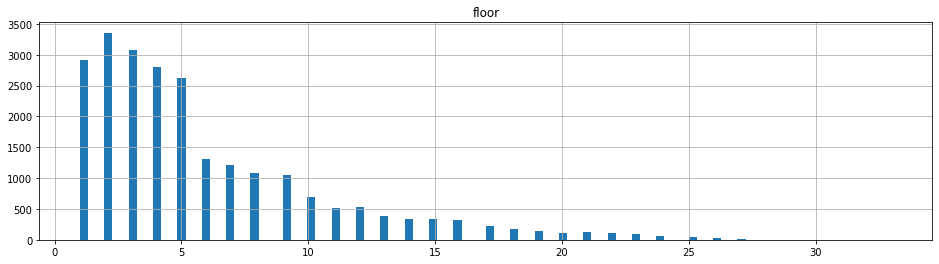

In [69]:
series_analys('floor')

Выглядит все корректно

# is_apartment

In [70]:
data.loc[data['is_apartment'] != True, 'is_apartment'] = False 
#меняем пропуски на False, т.к. скорее всего это не апартаменты, иначе продавец указал бы это

In [71]:
astype('is_apartment', 'bool') #меняем тип

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23662 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23662 non-null  int64         
 1   last_price            23662 non-null  float64       
 2   total_area            23662 non-null  float64       
 3   first_day_exposition  23662 non-null  datetime64[ns]
 4   rooms                 23662 non-null  int64         
 5   ceiling_height        23662 non-null  float64       
 6   floors_total          23662 non-null  int64         
 7   living_area           23661 non-null  float64       
 8   floor                 23662 non-null  int64         
 9   is_apartment          23662 non-null  bool          
 10  studio                23662 non-null  bool          
 11  open_plan             23662 non-null  bool          
 12  kitchen_area          21388 non-null  float64       
 13  balcony         

# studio

In [73]:
data['studio'].unique()

array([False,  True])

In [74]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23662 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23662 non-null  int64         
 1   last_price            23662 non-null  float64       
 2   total_area            23662 non-null  float64       
 3   first_day_exposition  23662 non-null  datetime64[ns]
 4   rooms                 23662 non-null  int64         
 5   ceiling_height        23662 non-null  float64       
 6   floors_total          23662 non-null  int64         
 7   living_area           23661 non-null  float64       
 8   floor                 23662 non-null  int64         
 9   is_apartment          23662 non-null  bool          
 10  studio                23662 non-null  bool          
 11  open_plan             23662 non-null  bool          
 12  kitchen_area          21388 non-null  float64       
 13  balcony         

# open_plan

In [75]:
data['open_plan'].unique()

array([False,  True])

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23662 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23662 non-null  int64         
 1   last_price            23662 non-null  float64       
 2   total_area            23662 non-null  float64       
 3   first_day_exposition  23662 non-null  datetime64[ns]
 4   rooms                 23662 non-null  int64         
 5   ceiling_height        23662 non-null  float64       
 6   floors_total          23662 non-null  int64         
 7   living_area           23661 non-null  float64       
 8   floor                 23662 non-null  int64         
 9   is_apartment          23662 non-null  bool          
 10  studio                23662 non-null  bool          
 11  open_plan             23662 non-null  bool          
 12  kitchen_area          21388 non-null  float64       
 13  balcony         

**Видим, что все строки в столбцах "studio" и "open_plan" заполнены, поэтому с данным показателем проводить дополнительные действия не нужно**

# kitchen_area

0     25.00
1     11.00
2      8.30
3       NaN
4     41.00
5      9.10
6     14.40
7     18.90
8      8.81
9      6.50
10     8.50
11     6.00
12     9.00
13     5.20
14     8.00
Name: kitchen_area, dtype: float64

count    21388.000000
mean        10.558622
std          5.831904
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

Text(0.5, 1.0, 'kitchen_area')

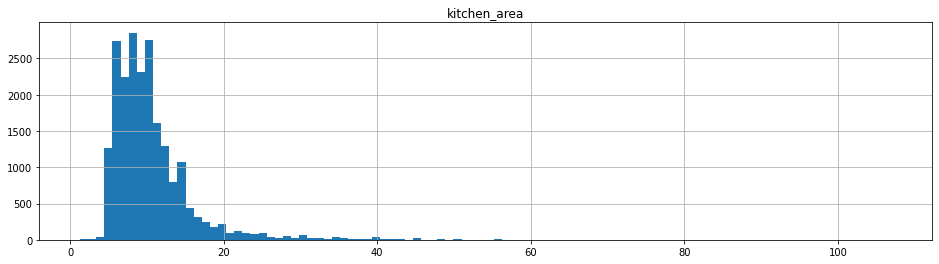

In [77]:
series_analys('kitchen_area')

In [78]:
percent('kitchen_area')

Пропусков в столбце kitchen_area : 9.610345701969402 %


In [79]:
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('rooms')['kitchen_area'].transform('median'))
#заменим пропуски медианными значениями по группе "комнатности" квартир

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23662 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23662 non-null  int64         
 1   last_price            23662 non-null  float64       
 2   total_area            23662 non-null  float64       
 3   first_day_exposition  23662 non-null  datetime64[ns]
 4   rooms                 23662 non-null  int64         
 5   ceiling_height        23662 non-null  float64       
 6   floors_total          23662 non-null  int64         
 7   living_area           23661 non-null  float64       
 8   floor                 23662 non-null  int64         
 9   is_apartment          23662 non-null  bool          
 10  studio                23662 non-null  bool          
 11  open_plan             23662 non-null  bool          
 12  kitchen_area          23455 non-null  float64       
 13  balcony         

# balcony

In [81]:
astype('balcony', float)

0     NaN
1     2.0
2     0.0
3     0.0
4     NaN
5     NaN
6     1.0
7     2.0
8     NaN
9     2.0
10    NaN
11    1.0
12    0.0
13    1.0
14    0.0
Name: balcony, dtype: float64

count    12158.000000
mean         1.148626
std          1.069919
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

Text(0.5, 1.0, 'balcony')

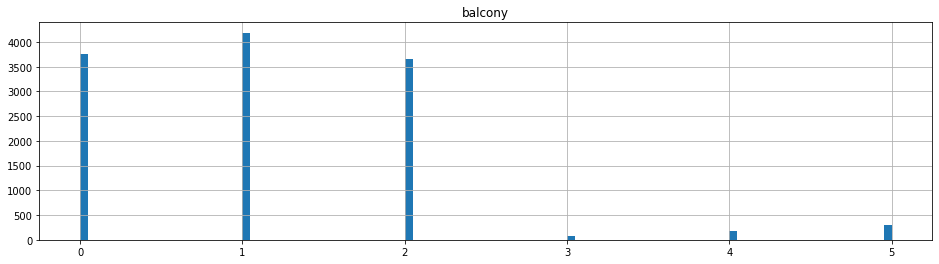

In [82]:
series_analys('balcony')

In [83]:
data['balcony'] = data['balcony'].fillna(0) #если клиент не указал информацию о наличии балкона, то его скорее всего нет

In [84]:
astype('balcony', int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23662 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23662 non-null  int64         
 1   last_price            23662 non-null  float64       
 2   total_area            23662 non-null  float64       
 3   first_day_exposition  23662 non-null  datetime64[ns]
 4   rooms                 23662 non-null  int64         
 5   ceiling_height        23662 non-null  float64       
 6   floors_total          23662 non-null  int64         
 7   living_area           23661 non-null  float64       
 8   floor                 23662 non-null  int64         
 9   is_apartment          23662 non-null  bool          
 10  studio                23662 non-null  bool          
 11  open_plan             23662 non-null  bool          
 12  kitchen_area          23455 non-null  float64       
 13  balcony         

# locality_name

In [85]:
percent('locality_name') #считаем пропуски

Пропусков в столбце locality_name : 0.20708308680584903 %


In [86]:
data['locality_name'] = data['locality_name'].fillna('неизвестно')
#т.к. достоверно местоположение квартиры не узнать, а количество пропуской не значительно, то их можно заменить на "неизвестно"

In [87]:
data['locality_name'].unique() #посмотрим уникальные занчения

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [88]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок станции', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество', 'садоводство')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество', 'садоводство')
#чтобы не было задвоения, заменим "ё" на "е" и различные виды поселков на "поселок"

In [89]:
display(data['locality_name'].unique())

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садоводство Новая Ропша', 'Павловск', 'деревня Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'деревня Куттузи', 'поселок Аннино', 'поселок Ефимовский',
       'поселок Плодовое', 'деревня Заклинье', 'поселок Торковичи',
       'поселок Первомайское', 'Красное Село', 'поселок Понтонный',
       'Сясьстрой', 'деревня Старая', 'деревня Лесколово',
       'поселок Новый Свет', 'Сланцы', 'село Путилово', 'Ивангород',
       'Мурино', 'Шлиссельбург', 'Никольское', 'Зеленогорск',
       '

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23662 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23662 non-null  int64         
 1   last_price            23662 non-null  float64       
 2   total_area            23662 non-null  float64       
 3   first_day_exposition  23662 non-null  datetime64[ns]
 4   rooms                 23662 non-null  int64         
 5   ceiling_height        23662 non-null  float64       
 6   floors_total          23662 non-null  int64         
 7   living_area           23661 non-null  float64       
 8   floor                 23662 non-null  int64         
 9   is_apartment          23662 non-null  bool          
 10  studio                23662 non-null  bool          
 11  open_plan             23662 non-null  bool          
 12  kitchen_area          23455 non-null  float64       
 13  balcony         

# cityCenters_nearest

In [91]:
astype('cityCenters_nearest', float)

0     16028.0
1     18603.0
2     13933.0
3      6800.0
4      8098.0
5         NaN
6     19143.0
7     11634.0
8         NaN
9     15008.0
10    13878.0
11    51677.0
12        NaN
13    33058.0
14    30759.0
Name: cityCenters_nearest, dtype: float64

count    18153.000000
mean     14196.719991
std       8605.869610
min        181.000000
25%       9238.000000
50%      13105.000000
75%      16294.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Text(0.5, 1.0, 'cityCenters_nearest')

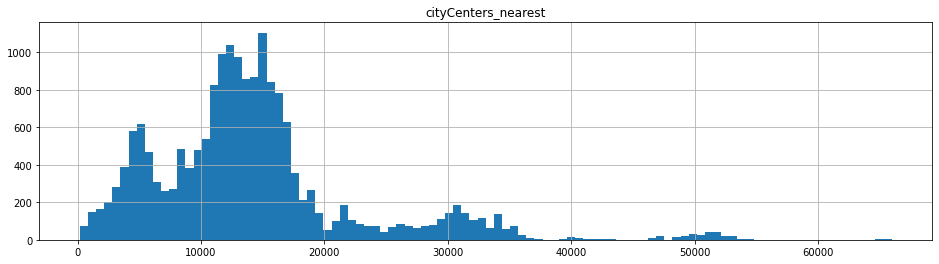

In [92]:
series_analys('cityCenters_nearest')

In [93]:
percent('cityCenters_nearest')

Пропусков в столбце cityCenters_nearest : 23.282055616600456 %


In [94]:
display(data['cityCenters_nearest'].isna().sum())

5509

In [95]:
data['cityCenters_nearest'] = (
    data['cityCenters_nearest'].fillna(data.groupby('locality_name')['cityCenters_nearest'].transform('median'))
)
#Заполним пропуски медианой расстояния до центра населенного пункта, где есть совпадения

In [96]:
display(data['cityCenters_nearest'].isna().sum()) 

4856

0     16028.0
1     18603.0
2     13933.0
3      6800.0
4      8098.0
5         NaN
6     19143.0
7     11634.0
8     21888.0
9     15008.0
10    13878.0
11    51677.0
12        NaN
13    33058.0
14    30759.0
Name: cityCenters_nearest, dtype: float64

count    18806.000000
mean     14446.449006
std       8594.383357
min        181.000000
25%       9479.500000
50%      13265.000000
75%      16735.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Text(0.5, 1.0, 'cityCenters_nearest')

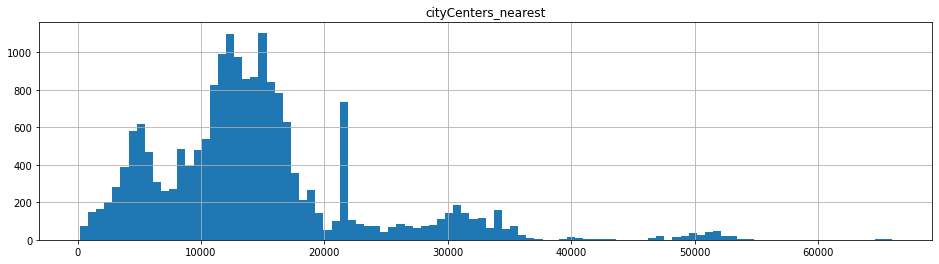

In [97]:
series_analys('cityCenters_nearest')

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23662 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23662 non-null  int64         
 1   last_price            23662 non-null  float64       
 2   total_area            23662 non-null  float64       
 3   first_day_exposition  23662 non-null  datetime64[ns]
 4   rooms                 23662 non-null  int64         
 5   ceiling_height        23662 non-null  float64       
 6   floors_total          23662 non-null  int64         
 7   living_area           23661 non-null  float64       
 8   floor                 23662 non-null  int64         
 9   is_apartment          23662 non-null  bool          
 10  studio                23662 non-null  bool          
 11  open_plan             23662 non-null  bool          
 12  kitchen_area          23455 non-null  float64       
 13  balcony         

Заменилось 133 пропуска

# parks_around3000

**Видно, что parks_around3000 и ponds_around3000 имеют одинаковое количество пропусков, проверим одинковые ли это строки**

0     1.0
1     0.0
2     1.0
3     2.0
4     2.0
5     NaN
6     0.0
7     0.0
8     NaN
9     0.0
10    1.0
11    0.0
12    NaN
13    1.0
14    0.0
Name: parks_around3000, dtype: float64

count    18154.000000
mean         0.611105
std          0.801805
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

Text(0.5, 1.0, 'parks_around3000')

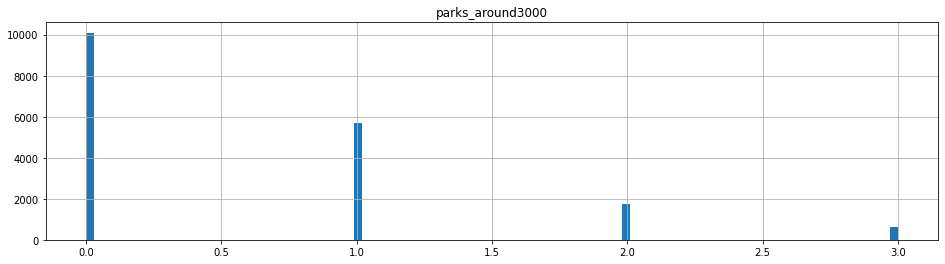

In [99]:
astype('parks_around3000', float)
series_analys('parks_around3000')

In [100]:
park_pond_empty = data[(data['parks_around3000'].isna() == True) & (data['ponds_around3000'].isna() == True)]

In [101]:
park_pond_empty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5508 entries, 5 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          5508 non-null   int64         
 1   last_price            5508 non-null   float64       
 2   total_area            5508 non-null   float64       
 3   first_day_exposition  5508 non-null   datetime64[ns]
 4   rooms                 5508 non-null   int64         
 5   ceiling_height        5508 non-null   float64       
 6   floors_total          5508 non-null   int64         
 7   living_area           5508 non-null   float64       
 8   floor                 5508 non-null   int64         
 9   is_apartment          5508 non-null   bool          
 10  studio                5508 non-null   bool          
 11  open_plan             5508 non-null   bool          
 12  kitchen_area          5424 non-null   float64       
 13  balcony          

**Mетод infо обнаружил совпадения в отсуствии данныx у parks_around3000, ponds_around3000, ponds_nearest, airports_nearest**

In [102]:
data['parks_around3000'] = data['parks_around3000'].fillna(0) #заменим пропуск на 0, будем считать, что парка нет рядом 
data['parks_around3000'] = data['parks_around3000'].astype(int) #зaменим Tип
data['parks_around3000'].value_counts()

0    15602
1     5670
2     1746
3      644
Name: parks_around3000, dtype: int64

0     1
1     0
2     1
3     2
4     2
5     0
6     0
7     0
8     0
9     0
10    1
11    0
12    0
13    1
14    0
Name: parks_around3000, dtype: int64

count    23662.000000
mean         0.468853
std          0.748286
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

Text(0.5, 1.0, 'parks_around3000')

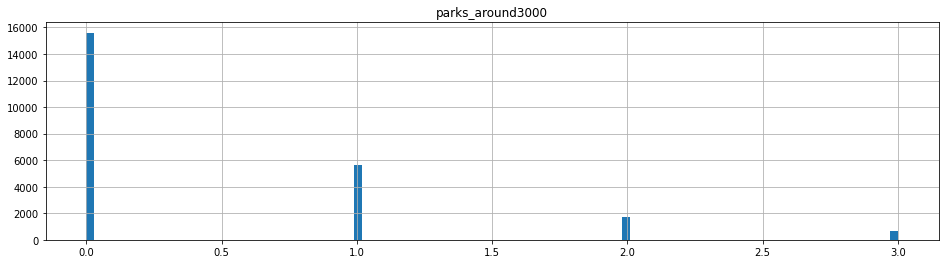

In [103]:
series_analys('parks_around3000')

# airports_nearest

In [104]:
astype('airports_nearest', float)

0     18863.0
1     12817.0
2     21741.0
3     28098.0
4     31856.0
5         NaN
6     52996.0
7     23982.0
8         NaN
9     50898.0
10    38357.0
11    48252.0
12        NaN
13    37868.0
14    20782.0
Name: airports_nearest, dtype: float64

count    18130.000000
mean     28797.254440
std      12631.852223
min          0.000000
25%      18579.000000
50%      26729.000000
75%      37282.250000
max      84869.000000
Name: airports_nearest, dtype: float64

Text(0.5, 1.0, 'airports_nearest')

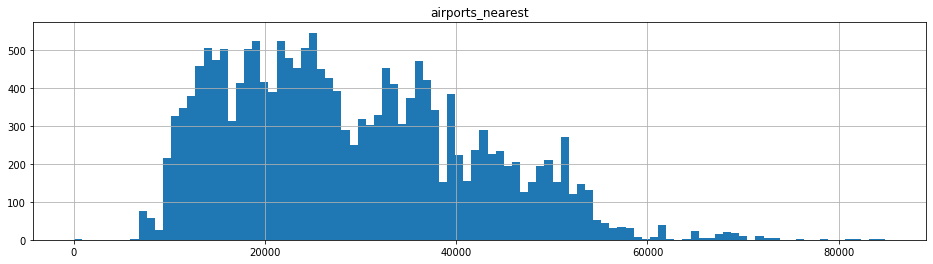

In [105]:
series_analys('airports_nearest')

In [106]:
data['airports_nearest'] = (
    data['airports_nearest'].fillna(data.groupby('locality_name')['airports_nearest'].transform('median'))
)

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23662 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23662 non-null  int64         
 1   last_price            23662 non-null  float64       
 2   total_area            23662 non-null  float64       
 3   first_day_exposition  23662 non-null  datetime64[ns]
 4   rooms                 23662 non-null  int64         
 5   ceiling_height        23662 non-null  float64       
 6   floors_total          23662 non-null  int64         
 7   living_area           23661 non-null  float64       
 8   floor                 23662 non-null  int64         
 9   is_apartment          23662 non-null  bool          
 10  studio                23662 non-null  bool          
 11  open_plan             23662 non-null  bool          
 12  kitchen_area          23455 non-null  float64       
 13  balcony         

Заменили 156 значений

# parks_nearest

In [108]:
astype('parks_nearest', float)

0     482.0
1       NaN
2      90.0
3      84.0
4     112.0
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10    310.0
11      NaN
12      NaN
13    294.0
14      NaN
Name: parks_nearest, dtype: float64

count    8064.000000
mean      490.826513
std       342.515015
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Text(0.5, 1.0, 'parks_nearest')

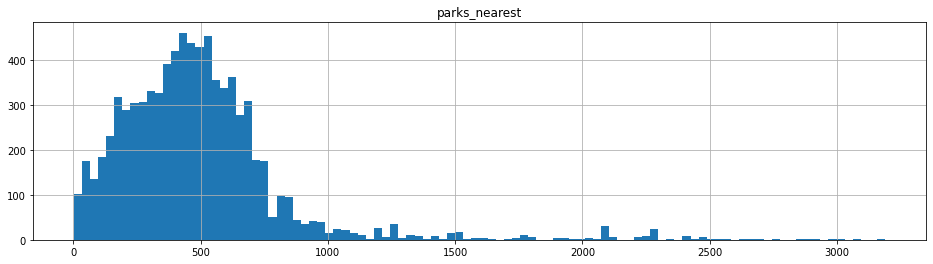

In [109]:
series_analys('parks_nearest')

In [110]:
data['parks_nearest'] = (
    data['parks_nearest'].fillna(data.groupby('locality_name')['parks_nearest'].transform('median'))
)

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23662 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23662 non-null  int64         
 1   last_price            23662 non-null  float64       
 2   total_area            23662 non-null  float64       
 3   first_day_exposition  23662 non-null  datetime64[ns]
 4   rooms                 23662 non-null  int64         
 5   ceiling_height        23662 non-null  float64       
 6   floors_total          23662 non-null  int64         
 7   living_area           23661 non-null  float64       
 8   floor                 23662 non-null  int64         
 9   is_apartment          23662 non-null  bool          
 10  studio                23662 non-null  bool          
 11  open_plan             23662 non-null  bool          
 12  kitchen_area          23455 non-null  float64       
 13  balcony         

Заменил 9614 пропусков

# ponds_around3000

In [112]:
astype('ponds_around3000', float)

In [113]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0) #заменим пропуск на 0, будем считать, что пруда нет рядом 
data['ponds_around3000'] = data['ponds_around3000'].astype(int) #зaменим Tип
data['ponds_around3000'].value_counts()

0    14568
1     5713
2     1885
3     1496
Name: ponds_around3000, dtype: int64

# ponds_nearest

In [114]:
astype('ponds_nearest', float)

0     755.0
1       NaN
2     574.0
3     234.0
4      48.0
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10    553.0
11      NaN
12      NaN
13    298.0
14     96.0
Name: ponds_nearest, dtype: float64

count    9094.000000
mean      518.379371
std       277.685028
min        13.000000
25%       294.000000
50%       503.000000
75%       730.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

Text(0.5, 1.0, 'ponds_nearest')

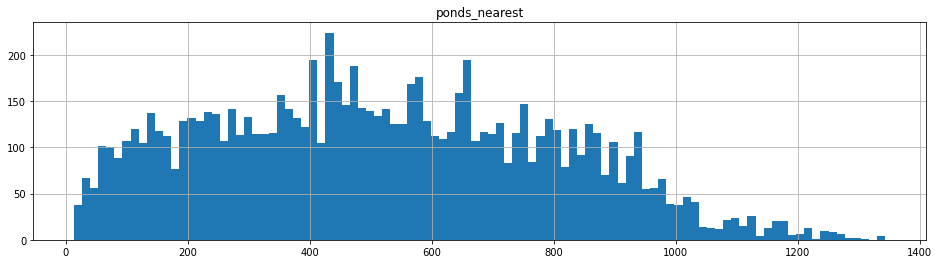

In [115]:
series_analys('ponds_nearest')

In [116]:
data['ponds_nearest'] = (
    data['ponds_nearest'].fillna(data.groupby('locality_name')['ponds_nearest'].transform('median'))
)
#Заменим на медианное значение по населенным пунктам

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23662 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23662 non-null  int64         
 1   last_price            23662 non-null  float64       
 2   total_area            23662 non-null  float64       
 3   first_day_exposition  23662 non-null  datetime64[ns]
 4   rooms                 23662 non-null  int64         
 5   ceiling_height        23662 non-null  float64       
 6   floors_total          23662 non-null  int64         
 7   living_area           23661 non-null  float64       
 8   floor                 23662 non-null  int64         
 9   is_apartment          23662 non-null  bool          
 10  studio                23662 non-null  bool          
 11  open_plan             23662 non-null  bool          
 12  kitchen_area          23455 non-null  float64       
 13  balcony         

Всего заменил 9608 пропусков

# days_exposition

In [118]:
to_numeric('days_exposition')

0       NaN
1      81.0
2     558.0
3     424.0
4     121.0
5      55.0
6     155.0
7       NaN
8     189.0
9     289.0
10    137.0
11      7.0
12     90.0
13    366.0
14    203.0
Name: days_exposition, dtype: float64

count    20489.000000
mean       180.870321
std        219.613660
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Text(0.5, 1.0, 'days_exposition')

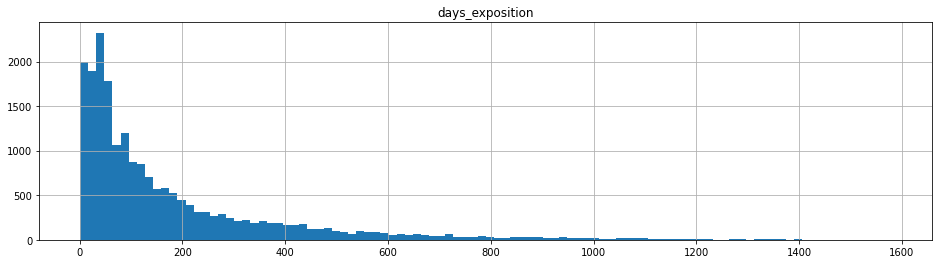

In [119]:
series_analys('days_exposition')

In [120]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23662.000000,2.366200e+04,23662.000000,23662.000000,23662.000000,23662.000000,23661.000000,23662.000000,23455.000000,23662.000000,18806.000000,18806.000000,23662.000000,17674.000000,23662.000000,18698.000000,20489.000000
mean,9.860663,6.515768e+06,60.220437,2.065337,2.697063,10.677077,34.254903,5.892993,10.455179,0.590187,29492.098213,14446.449006,0.468853,475.965826,0.590440,498.941090,180.870321
std,5.681529,1.054275e+07,34.830086,1.052186,0.252693,6.589125,21.237289,4.884331,5.595400,0.957996,13038.256403,8594.383357,0.748286,235.478512,0.883472,206.956055,219.613660
min,0.000000,1.219000e+04,12.000000,0.000000,2.500000,1.000000,7.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.400000,2.000000,7.300000,0.000000,18811.000000,9479.500000,0.000000,428.500000,0.000000,442.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.640000,9.000000,30.300000,4.000000,9.045000,0.000000,27154.000000,13265.000000,0.000000,460.000000,0.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.787500,3.000000,2.700000,16.000000,42.700000,8.000000,11.500000,1.000000,38505.000000,16735.000000,1.000000,460.000000,1.000000,553.000000,232.000000
max,50.000000,7.630000e+08,631.200000,9.000000,14.000000,60.000000,347.500000,33.000000,107.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Во время анализа были найдены аномалии, такие как:
<b>1)</b> жилая площадь в некоторых объявлениях была в несколько раз меньше общей площади, что было исправлено с учетом наличия кухни и студии
<b>2)</b> высота потолков была минимум 2 метра, что ниже минимальной высоты по СНиП, поэтому всё ниже 2.5 метров было приведено к 2.5 метрам
<b>3)</b> объявления с количеством комнат больше 8 были удалены.
    <b>Так же были заполнены пропуски в каждом столбце</b>**
</div>

### Посчитайте и добавьте в таблицу новые столбцы

In [121]:
data['price_square'] = data['last_price'] / data['total_area']

In [122]:
data['weekday'] = data['first_day_exposition'].dt.weekday

In [123]:
data['month'] = data['first_day_exposition'].dt.month

In [124]:
data['year'] = data['first_day_exposition'].dt.year

In [125]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
data['floor_type'] = data.apply(floor_type, axis=1)

In [126]:
data['distance_to_center'] = data['cityCenters_nearest'] / 1000

In [127]:
def categorize_area(row):
    if row <= 35:
        return 'до 35 кв.м'
    elif 35.01 <= row <= 55:
        return '36-55 кв.м'
    elif 55.01 <= row <= 70:
        return '56-70 кв.м'
    elif 70.01 <= row <= 100:
        return '71-100 кв.м'
    elif row >= 100.01:
        return 'свыше 100 кв.м'

data['total_area_category'] = data['total_area'].apply(categorize_area)
data['living_area_category'] = data['living_area'].apply(categorize_area)
data['kitchen_area_category'] = data['kitchen_area'].apply(categorize_area)

In [128]:
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_square,weekday,month,year,floor_type,distance_to_center,total_area_category,living_area_category,kitchen_area_category
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,NaN,120370.370370,3,3,2019,другой,16.028,свыше 100 кв.м,36-55 кв.м,до 35 кв.м
1,7,3350000.0,40.40,2018-12-04,1,2.64,11,18.60,1,False,...,81.0,82920.792079,1,12,2018,первый,18.603,36-55 кв.м,до 35 кв.м,до 35 кв.м
2,10,5196000.0,56.00,2015-08-20,2,2.60,5,34.30,4,False,...,558.0,92785.714286,3,8,2015,другой,13.933,56-70 кв.м,до 35 кв.м,до 35 кв.м
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,45.00,9,False,...,424.0,408176.100629,4,7,2015,другой,6.800,свыше 100 кв.м,36-55 кв.м,до 35 кв.м
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,121.0,100000.000000,1,6,2018,другой,8.098,71-100 кв.м,до 35 кв.м,36-55 кв.м
5,10,2890000.0,30.40,2018-09-10,1,2.64,12,14.40,5,False,...,55.0,95065.789474,0,9,2018,другой,NaN,до 35 кв.м,до 35 кв.м,до 35 кв.м
6,6,3700000.0,37.30,2017-11-02,1,2.64,26,10.60,6,False,...,155.0,99195.710456,3,11,2017,другой,19.143,36-55 кв.м,до 35 кв.м,до 35 кв.м
7,5,7915000.0,71.60,2019-04-18,2,2.60,24,30.50,22,False,...,NaN,110544.692737,3,4,2019,другой,11.634,71-100 кв.м,до 35 кв.м,до 35 кв.м
8,20,2900000.0,33.16,2018-05-23,1,2.64,27,15.43,26,False,...,189.0,87454.764777,2,5,2018,другой,21.888,до 35 кв.м,до 35 кв.м,до 35 кв.м
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,289.0,88524.590164,6,2,2017,другой,15.008,56-70 кв.м,36-55 кв.м,до 35 кв.м


In [129]:
data['total_area_category'].value_counts()

36-55 кв.м        9556
56-70 кв.м        4866
71-100 кв.м       3897
до 35 кв.м        3518
свыше 100 кв.м    1825
Name: total_area_category, dtype: int64

In [130]:
data['living_area_category'].value_counts()

до 35 кв.м        15064
36-55 кв.м         6329
56-70 кв.м         1209
71-100 кв.м         702
свыше 100 кв.м      357
Name: living_area_category, dtype: int64

In [131]:
data['kitchen_area_category'].value_counts()

до 35 кв.м        23241
36-55 кв.м          181
56-70 кв.м           24
71-100 кв.м           7
свыше 100 кв.м        2
Name: kitchen_area_category, dtype: int64

### Проведите исследовательский анализ данных

# **Изучите, как быстро продавались квартиры**

<AxesSubplot:>

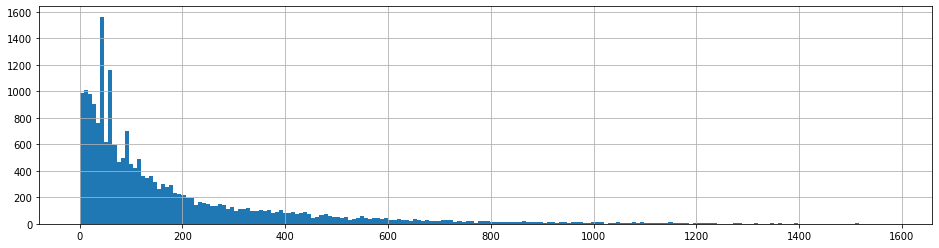

In [132]:
data['days_exposition'].hist(bins=200, figsize=(16, 4)) #строим гистоограмму времени продаж

<AxesSubplot:>

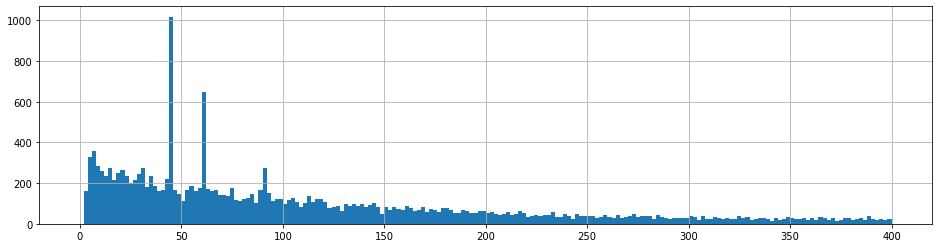

In [133]:
data['days_exposition'].hist(bins=200, figsize=(16, 4), range=(0, 400)) #посомтрим левую часть гистограммы

Видны редкие выбросы

<AxesSubplot:>

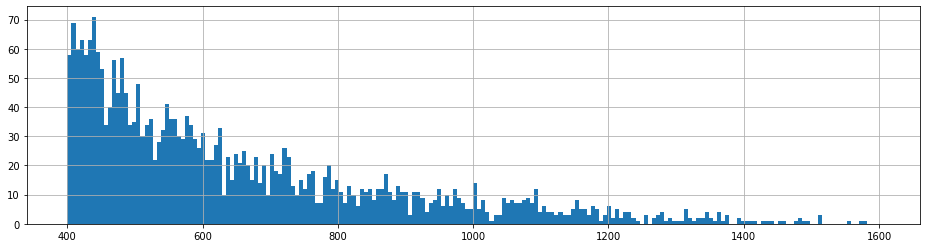

In [134]:
data['days_exposition'].hist(bins=200, figsize=(16, 4), range=(400, 1600)) #посомтрим правую часть гистограммы

In [135]:
print('Среднее кол-во дней до продажи:', data['days_exposition'].mean())
print('Медиана кол-ва дней до продажи:', data['days_exposition'].median())

Среднее кол-во дней до продажи: 180.87032065986628
Медиана кол-ва дней до продажи: 95.0


In [136]:
data.groupby('rooms')['days_exposition'].median()

rooms
0     45.0
1     81.0
2     91.0
3    114.0
4    156.0
5    185.5
6    201.5
7    138.0
8    249.0
9    469.5
Name: days_exposition, dtype: float64

**Квартиры продаются в течении нескольких месяцев (около 3). Считаю, что это довольно хорошее время, т.к. для столько серьезной покупки, клиенты могут искать квартиру мечты месяцами. Из вывода выше мы можем заметить, что самые быстро покупаемые квартиры это однокомнатные и двухкомнатные.
    Так же довольно долго продаются квартиры с большим количеством комнат, тут влияет несколько факторов: стоимость таких объектов, такое количество комнат не всем нужно**

# **Влияние различных факторов на окончательную стоимость квартиры**

**Влияние от общей площади**

0.6438862676050402


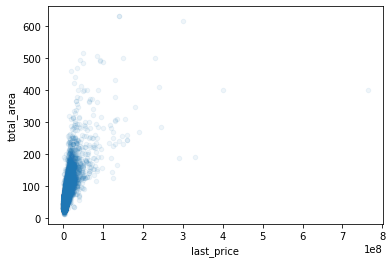

In [137]:
data.plot(x='last_price', y='total_area', kind='scatter',  alpha=0.07)
print(data['total_area'].corr(data['last_price']))

 **Корреляция в 0.64 говорит о наличии связи, однако не слишком сильной. Выходит, увеличение общей площади идет вместе с увеличением стоимости, но так бывает не всегда.**

**Влияние от жилой площади**

0.5502406659193627


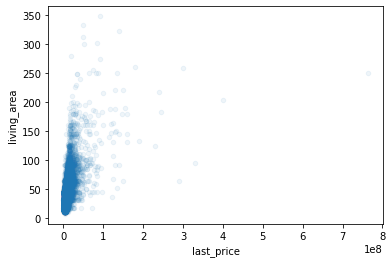

In [138]:
data.plot(x='last_price', y='living_area', kind='scatter',  alpha=0.07)
print(data['living_area'].corr(data['last_price']))

**Корреляция в 0.55 так же говорит о наличии связи, однако снова не слишком сильной. Выходит, увеличение жилой площади идет вместе с увеличением стоимости, но опять же так бывает не всегда.**

**Влияние от площади кухни**

0.4397192284477456


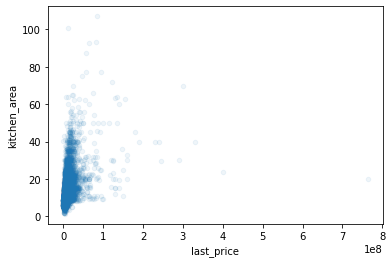

In [139]:
data.plot(x='last_price', y='kitchen_area', kind='scatter',  alpha=0.07)
print(data['kitchen_area'].corr(data['last_price']))

**Корреляция в 0.44 показывает наличие связи, но довольно слабой. Выходит, увеличение площади кухни слабо влияет на стоимость.**

**Влияние от кол-ва комнат**

In [140]:
def conversion(column):
    conv_table = (
        data.pivot_table(index = column, values = 'last_price', aggfunc = 'median')
        .plot(style='o-')
    )

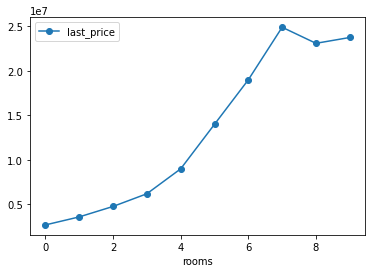

In [141]:
conversion('rooms')

**Влияние от типа этажа**

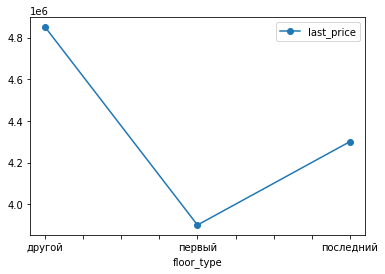

In [142]:
conversion('floor_type')

**Влияние от дня продажи**

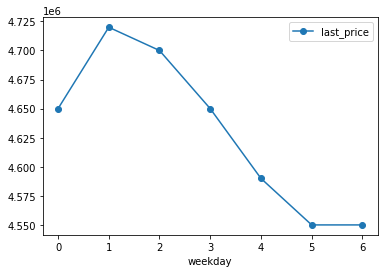

In [143]:
conversion('weekday')

**Влияние от месяца продажи**

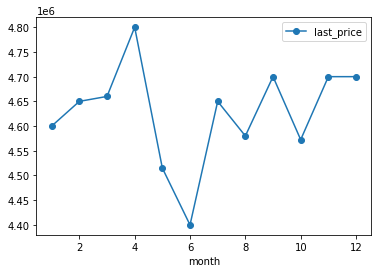

In [144]:
conversion('month')

**Влияние от года продажи**

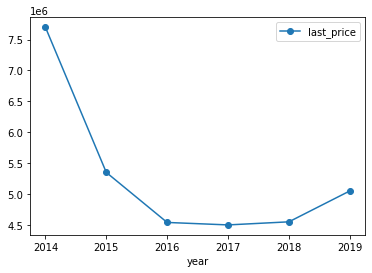

In [145]:
conversion('year')

# **Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

In [146]:
mean_price_group = (data.groupby('locality_name')
                    .agg({'total_images': 'count', 'price_square': 'mean'})
                    .sort_values(by='total_images', ascending=False).head(10))
mean_price_group.columns = ['Всего объявлений', 'Средняя цена за 1 кв.м']
display(mean_price_group)

,Всего объявлений,Средняя цена за 1 кв.м
locality_name,,
Санкт-Петербург,15695,114812.342935
поселок Мурино,554,85656.214377
поселок Шушары,440,78677.364217
Всеволожск,398,68654.473986
Пушкин,369,103125.819291
Колпино,338,75424.579098
поселок Парголово,327,90175.913458
Гатчина,306,68757.678644
деревня Кудрово,299,92473.547576


**Из данной таблицы видно,что наибольшее число объявлений о продаже в Санкт-Петербурге. Оно и понятно, самый крупный нгород в датасете. Так же на 2 и 3 месте самые быстрорастущие города близь Санкт-Петербурга, от это и кол-во объявлений большое.
Но от Санк-Петербурга при средней цене за квадрат в 114812.0 руб. недалеко ушел Пушкин с ценой 103125.0 руб.**

# Средняя цена километра до центра в Санкт-Петербурге

<AxesSubplot:xlabel='distance_to_center'>

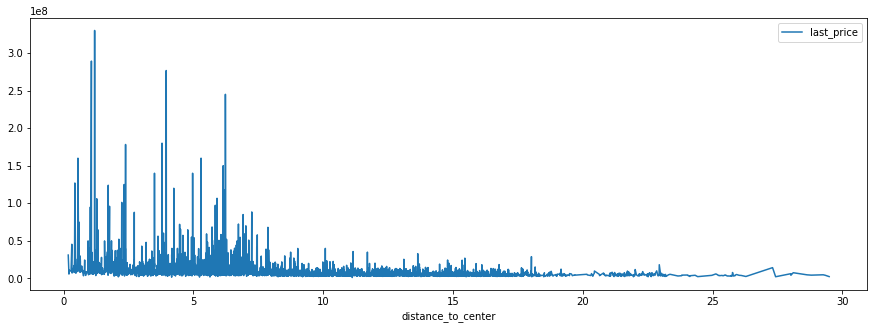

In [148]:
spb = data[data['locality_name'] == 'Санкт-Петербург']
sbp_mean = spb.pivot_table(index = 'distance_to_center', values = 'last_price', aggfunc = 'mean')

sbp_mean.plot(figsize=(15, 5))

**Цена квартиры складывается из многих факторов, среди которых растояние до центра города. Чем ближе квартира к популярным достопримечательностям, крупным бизнес-центрам, кинотеатрам, кафе, торговым комплексам, тем она дороже**

### Общий вывод

**Был проведен анализ недвижмости Санкт-Петербурга и ближайших к нему населеных пунктов, в результате которого мы выяснили:**
- чаще на продажу выставляют квартиры с метражом от 36 до 55 кв.м
- в основном на продажу выставляют квартиры с 1 или 2 комнатами, раза в 3 меньше продаются квартиры с 3 комнатами
- стоимость квартир на первом и последнем этаже ниже аналогичных квартир находящихся выше 1 этажа и ниже последнего этажа
- самые дорогие квартиры продавались по вторникам и средам, а самые дешевые на выходных
- в 2014 году были самые высокие цены на квартиры, с 2015 по 2018 произошло резкое падение стоимости и только в 2019 году виден рост
- больше 2/3 квартир имеют балконы
- квартиры в основном находятся на этажах с 3 по 8
- среднее растояние до центра города 14 км
- до аэропорта 29 км
- больше половины объявлений не имеют парка, а соответственно и пруда в радиусе 3 км
- квартиры продаются около 180 дней с момента выставления на продажу